# UF-ECT Setup Framework Examples
This notebook contains examples of the setup framework described in Price-Broncucia et al, 2024. Most of the figures in the paper can be produced directly using data in the repository and this notebook.

In [67]:
from importlib import reload
import new_model_routine

reload(new_model_routine)

from new_model_routine import *

# MPAS-A

Opening ../../FMA/mpas_with_FMA.summary.nc
43 shared variables
Up to save 40


/Users/teopb/miniconda3/envs/numerical/lib/python3.11/site-packages/scipy/stats/_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


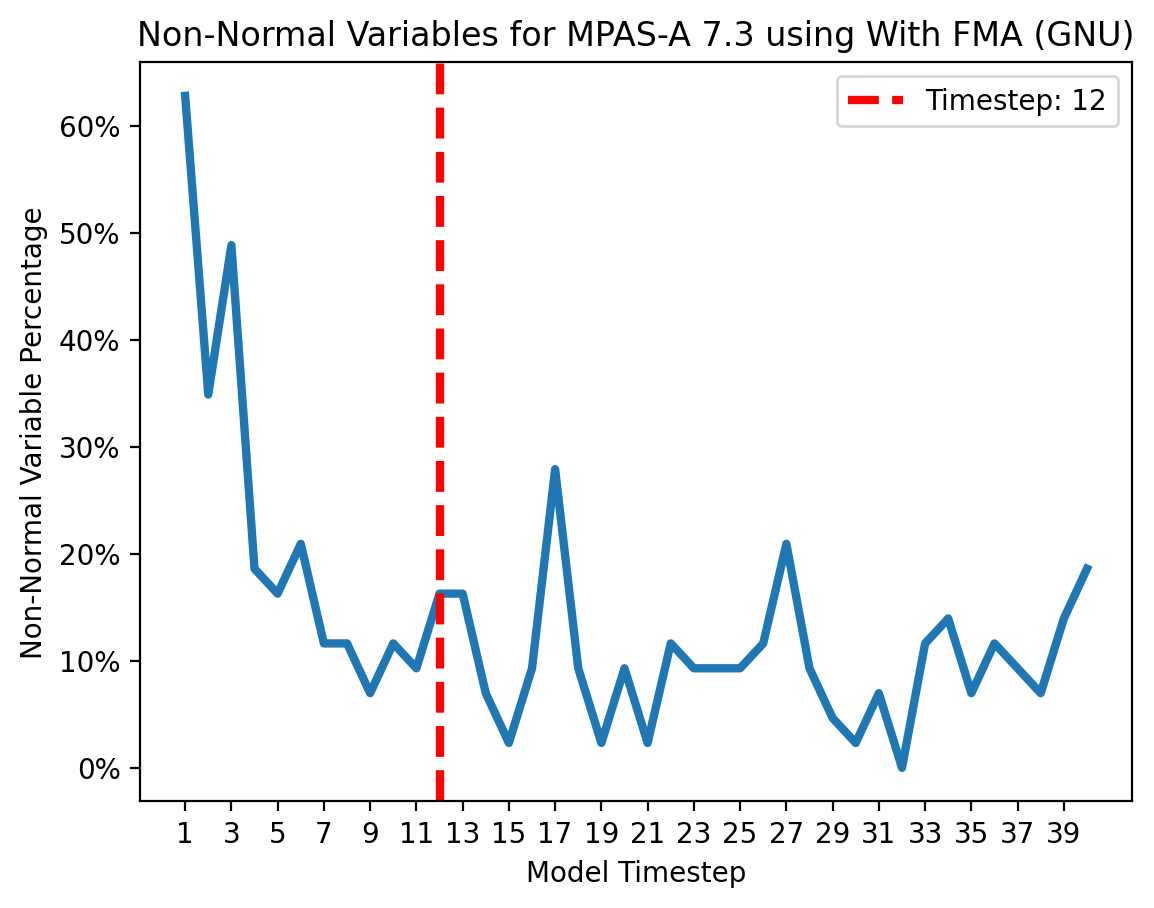

/Users/teopb/miniconda3/envs/numerical/lib/python3.11/site-packages/scipy/stats/_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


Opening ../../FMA/mpas_no_FMA.summary.nc
43 shared variables
Up to save 40


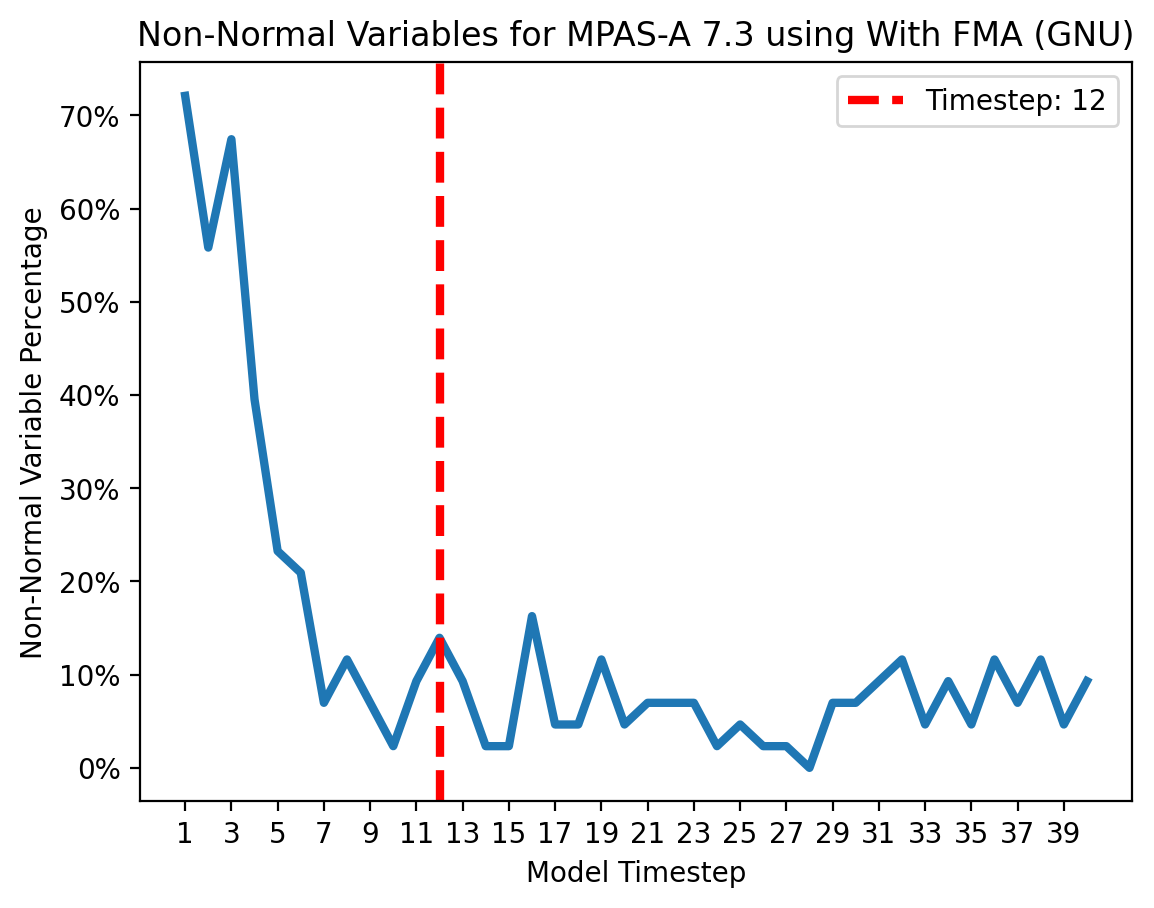

Opening ../../FMA/mpas_GNU.summary.nc
43 shared variables
Up to save 40


/Users/teopb/miniconda3/envs/numerical/lib/python3.11/site-packages/scipy/stats/_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


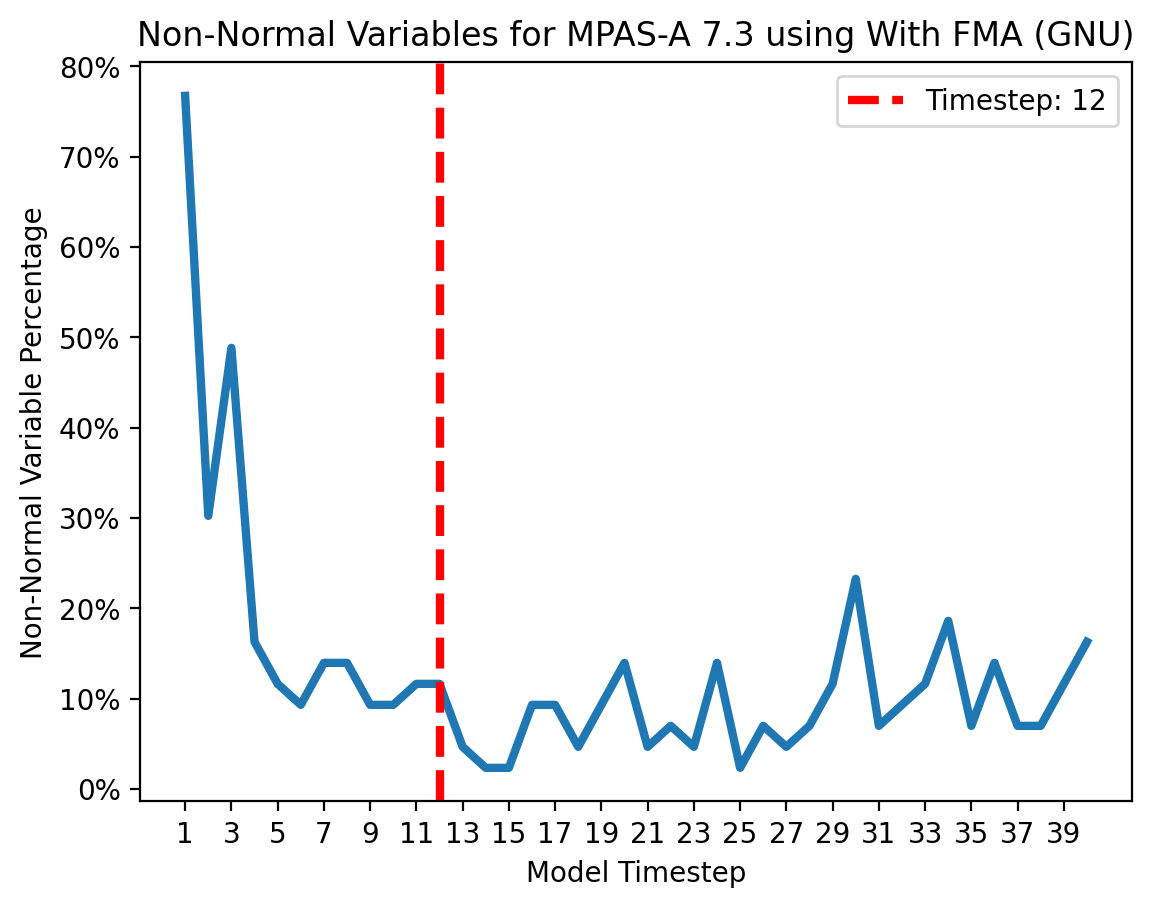

Opening ../../FMA/mpas_GNU_nofma.summary.nc
43 shared variables
Up to save 40


/Users/teopb/miniconda3/envs/numerical/lib/python3.11/site-packages/scipy/stats/_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


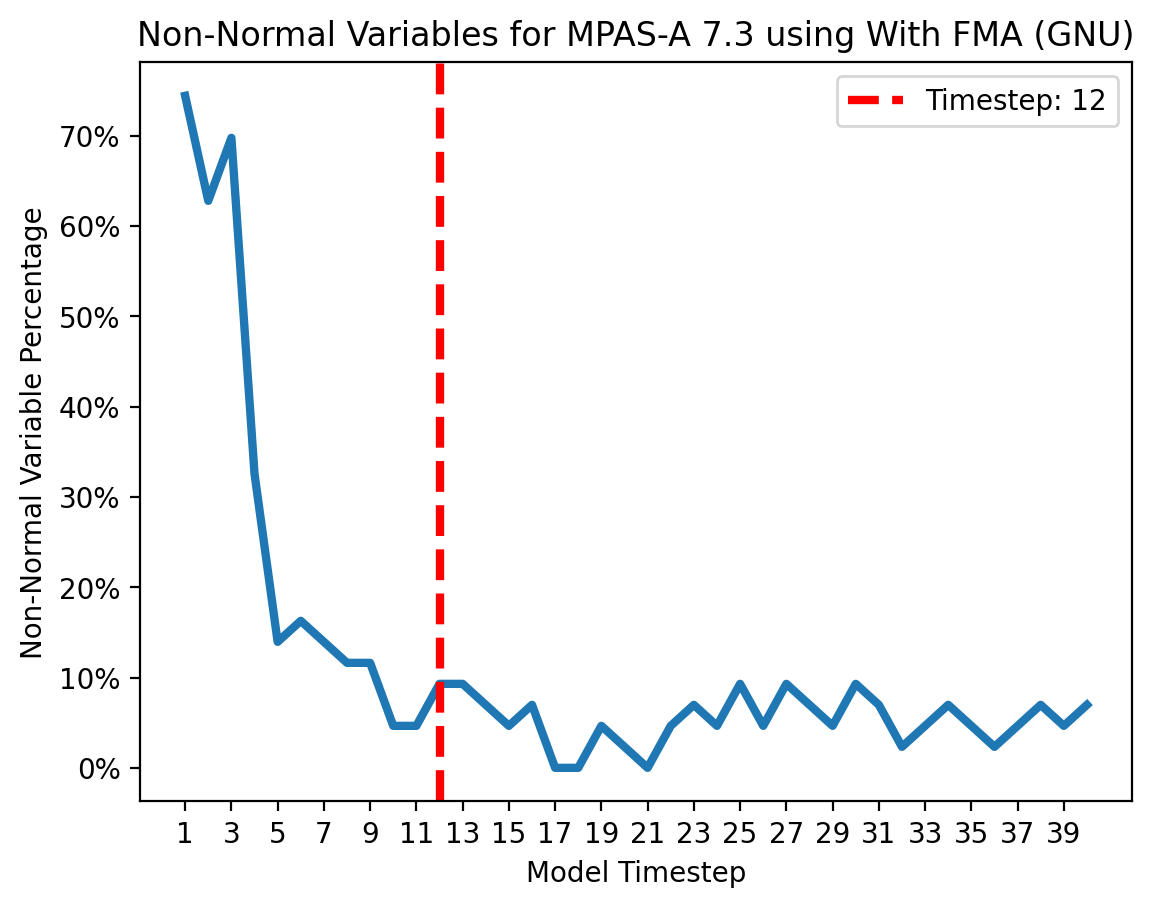

In [55]:
data_file_prefix = "../../FMA/"

with_FMA_file = data_file_prefix + "mpas_with_FMA.summary.nc"
no_FMA_file = data_file_prefix + "mpas_no_FMA.summary.nc"
GNU_with_FMA_file = data_file_prefix + "mpas_GNU.summary.nc"
GNU_no_FMA_file = data_file_prefix + "mpas_GNU_nofma.summary.nc"

filenames = [with_FMA_file, no_FMA_file, GNU_with_FMA_file, GNU_no_FMA_file]
first_timestep = 1
save_interval = 1

for file in filenames:
    all_standard_means, timesteps, shared_vars = read_summary_series_single_file(
        file, first_timestep, save_interval, up_to_save=40
    )

    shapiro_wilks_over_time(
        all_standard_means,
        timesteps,
        shared_vars,
        title=f"Non-Normal Variables for MPAS-A 7.3 using {labels[i]}",
        mark_timestep=12,
    )

Opening ../../FMA/mpas_intel_nofma_7day.summary.nc
43 shared variables
(28, 43, 430)
Sample size: 93
Sample size: 143
Sample size: 193
Sample size: 243
Sample size: 293
Sample size: 343
Sample size: 393
Sample size: 443
[17, 21, 22, 22, 22, 23, 23, 23]


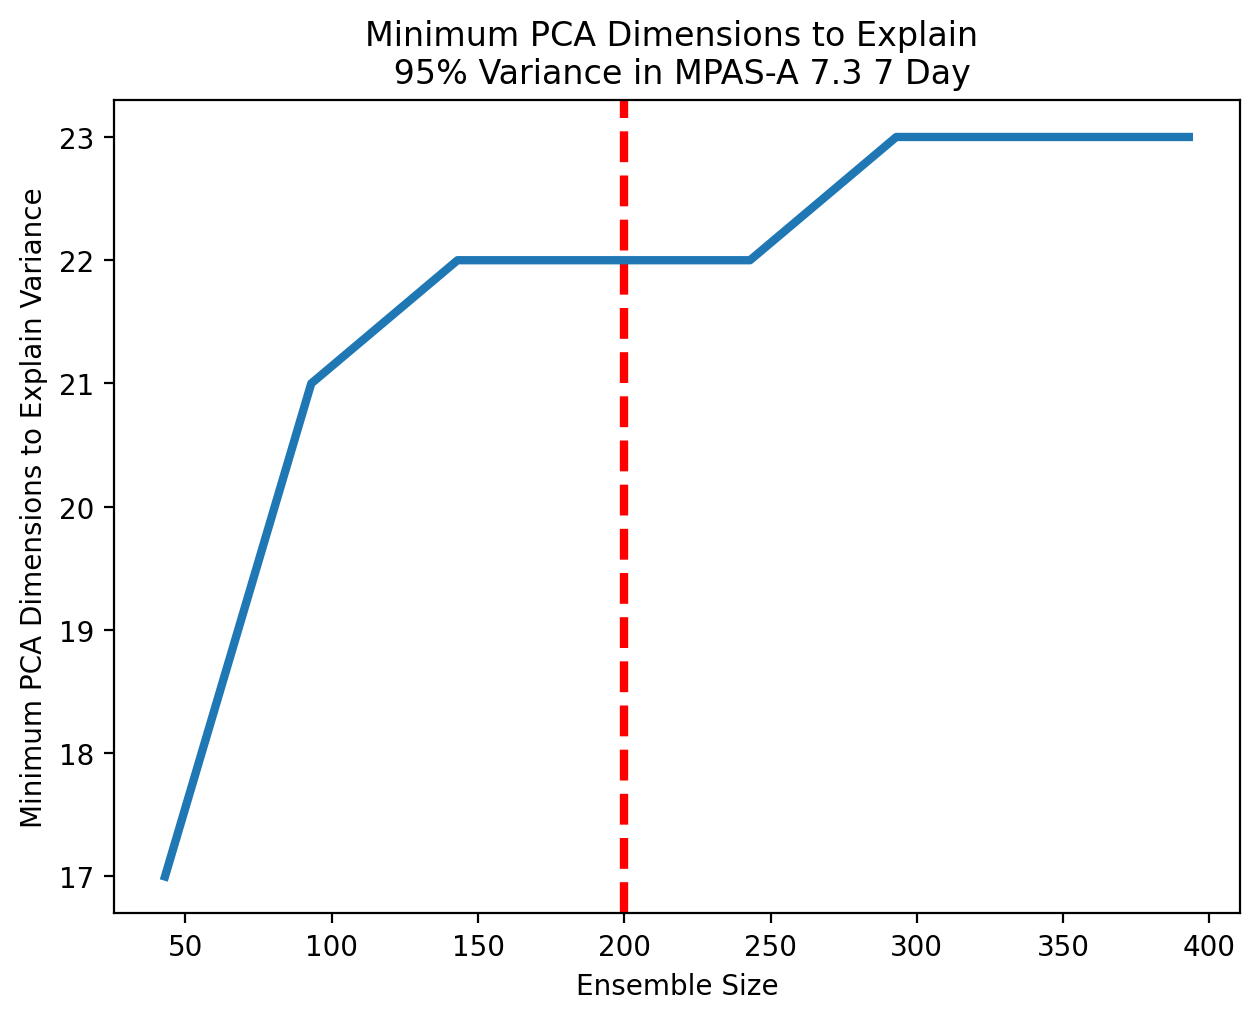

([43, 93, 143, 193, 243, 293, 343, 393], [17, 21, 22, 22, 22, 23, 23, 23])

In [72]:
no_fma_intel_7day_file = data_file_prefix + "mpas_intel_nofma_7day.summary.nc"

all_standard_means, timesteps, shared_vars = read_summary_series_single_file(
    no_fma_intel_7day_file, 1, 1
)

print(all_standard_means.shape)


title = "Minimum PCA Dimensions to Explain \n 95% Variance in MPAS-A 7.3 7 Day"
stable_PCs_required_dataset(all_standard_means, 28, timesteps, 0.95, title=title, vertical_line=200)

0
1
2
3


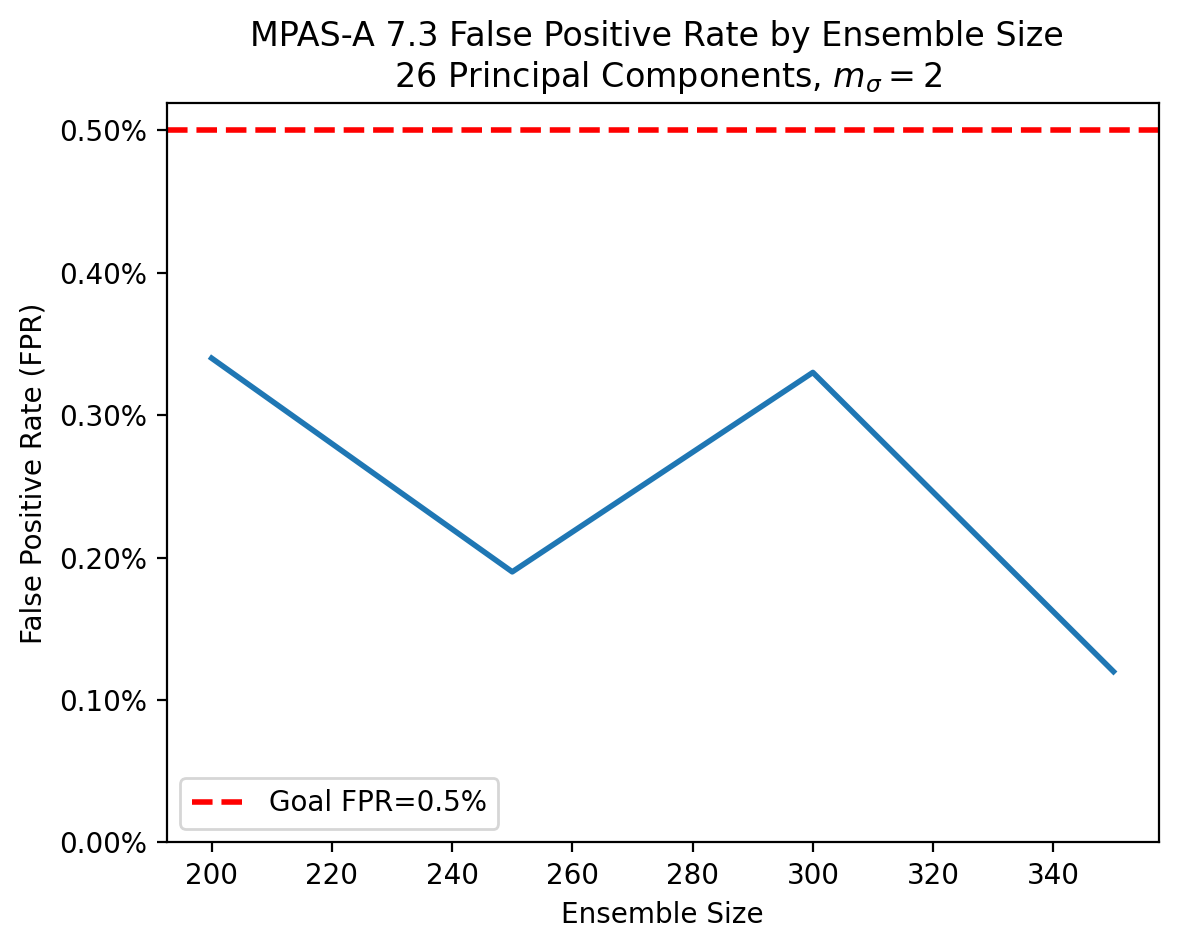

([200, 250, 300, 350], array([0.0034, 0.0019, 0.0033, 0.0012]))

In [30]:
title = (
    f"MPAS-A 7.3 False Positive Rate by Ensemble Size \n 26 Principal Components, $m_\\sigma = 2$"
)
run_fpr_tests(folder, file_prefix, file_suffix, 12, timesteps, 26, 200, 2, title=title)

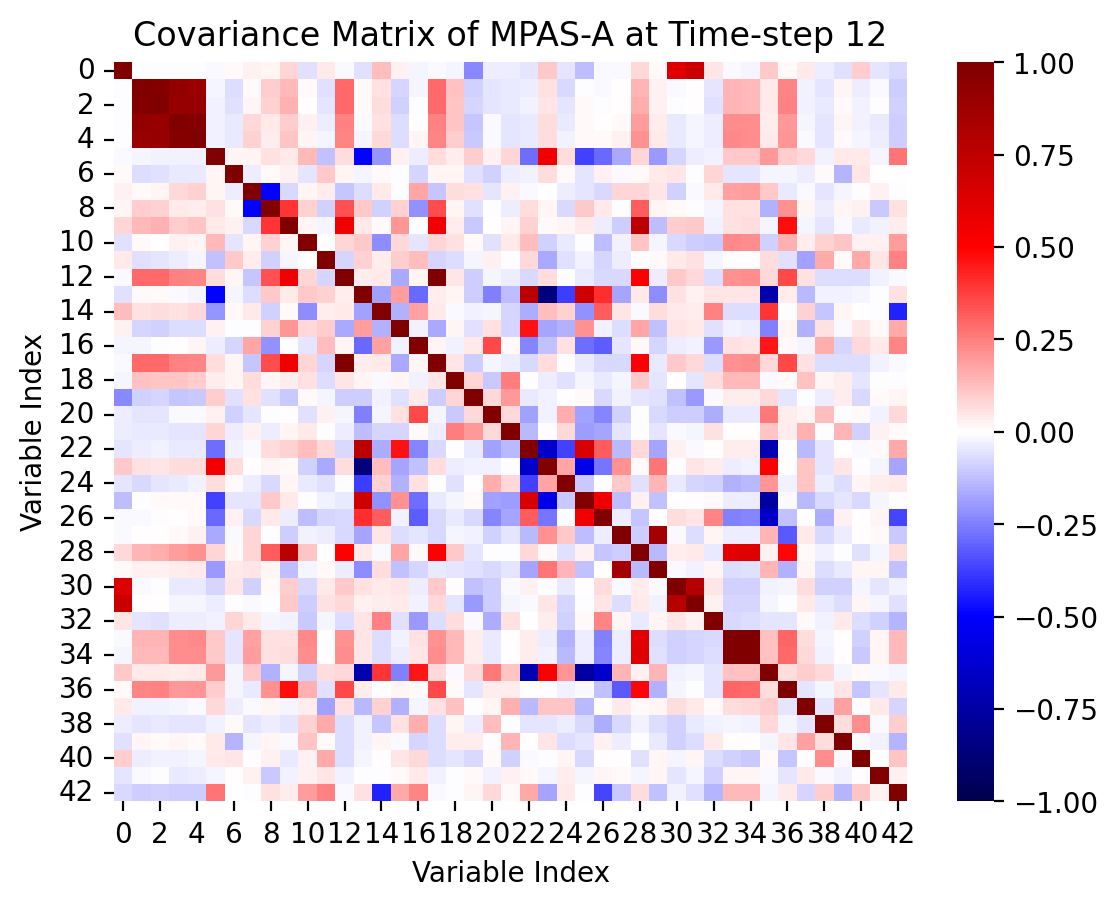

array([[ 1.        , -0.00572196, -0.00611788, ...,  0.09521633,
        -0.05171301, -0.07056842],
       [-0.00572196,  1.        ,  0.98378304, ..., -0.03476302,
        -0.01313133, -0.09848692],
       [-0.00611788,  0.98378304,  1.        , ..., -0.03081898,
        -0.00383118, -0.09139986],
       ...,
       [ 0.09521633, -0.03476302, -0.03081898, ...,  1.        ,
         0.00697624,  0.11353871],
       [-0.05171301, -0.01313133, -0.00383118, ...,  0.00697624,
         1.        ,  0.02958879],
       [-0.07056842, -0.09848692, -0.09139986, ...,  0.11353871,
         0.02958879,  1.        ]])

In [24]:
make_cov_plot(
    all_standard_means, timesteps, 12, title="Covariance Matrix of MPAS-A at Time-step 12"
)

/var/folders/_z/7wbb99d96hb4l2w95ymyxg280000gn/T/ipykernel_2005/3861227645.py:87: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


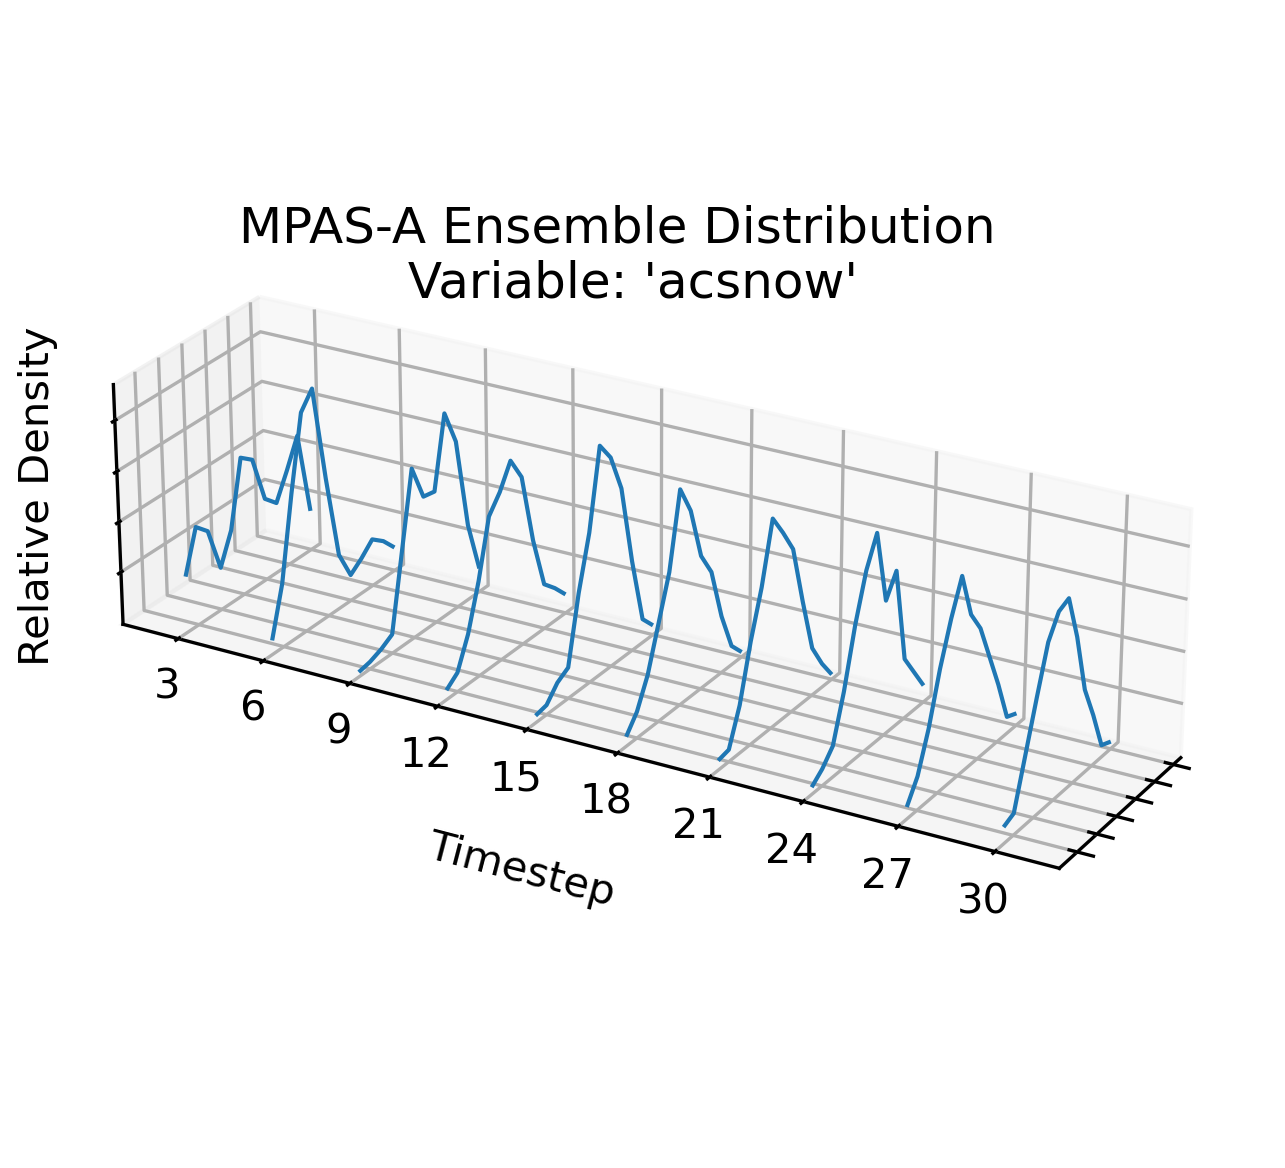

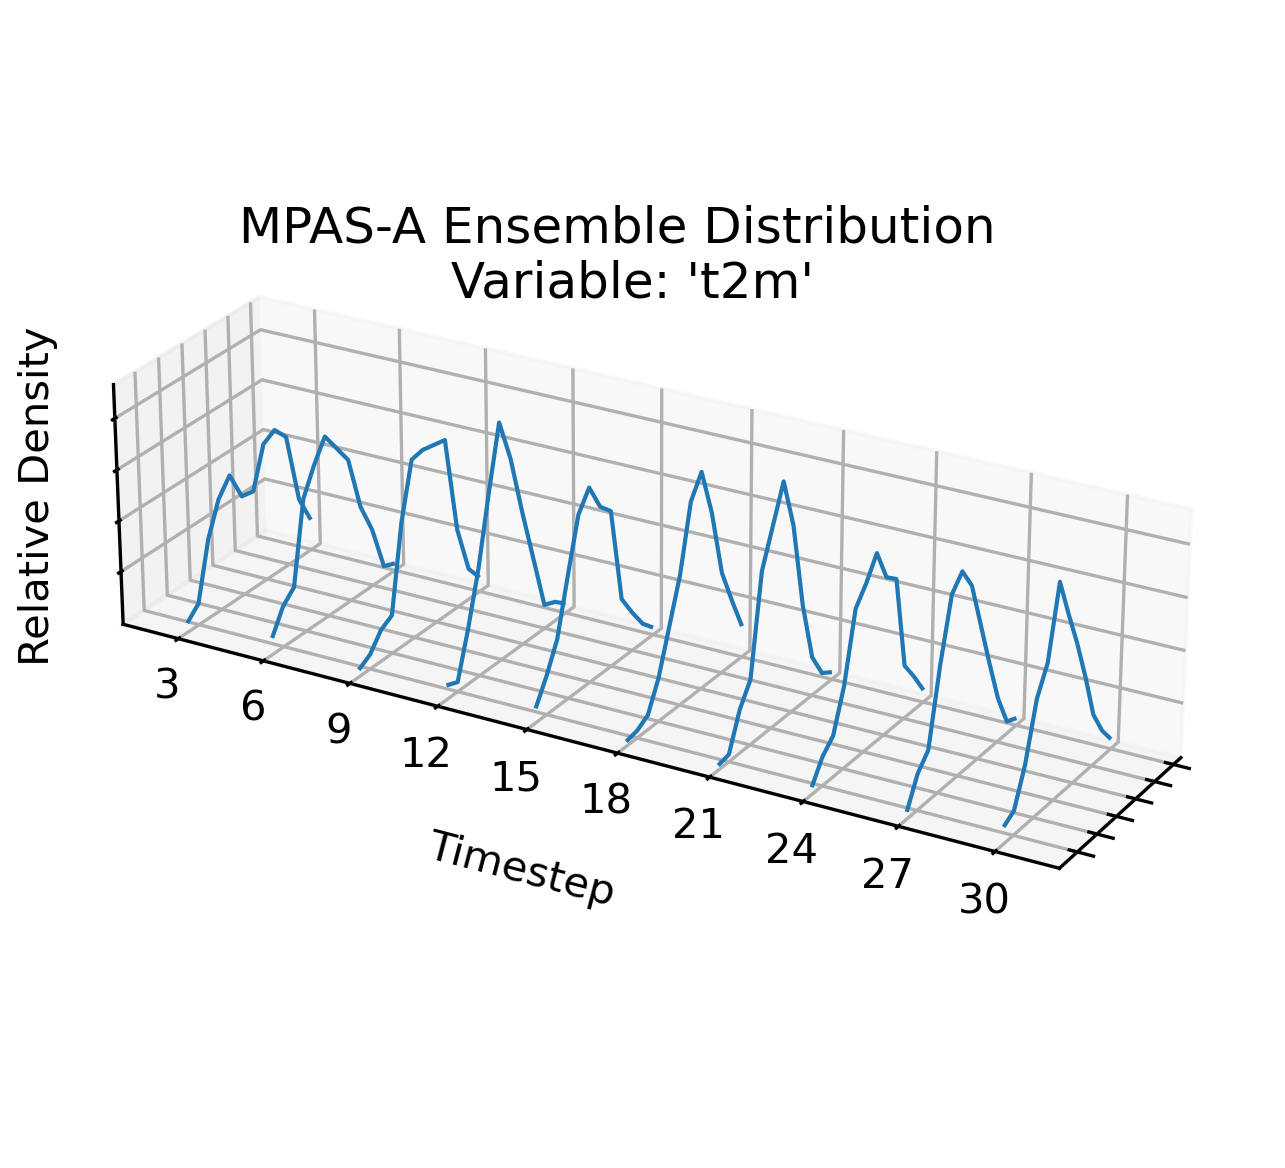

In [26]:
var_1 = b'acsnow                '
var_2 = b't2m                   '
plot_ensemble_spread(all_standard_means, timesteps[:10], shared_vars, var_1, title="")
plot_ensemble_spread(all_standard_means, timesteps[:10], shared_vars, var_2, title="")

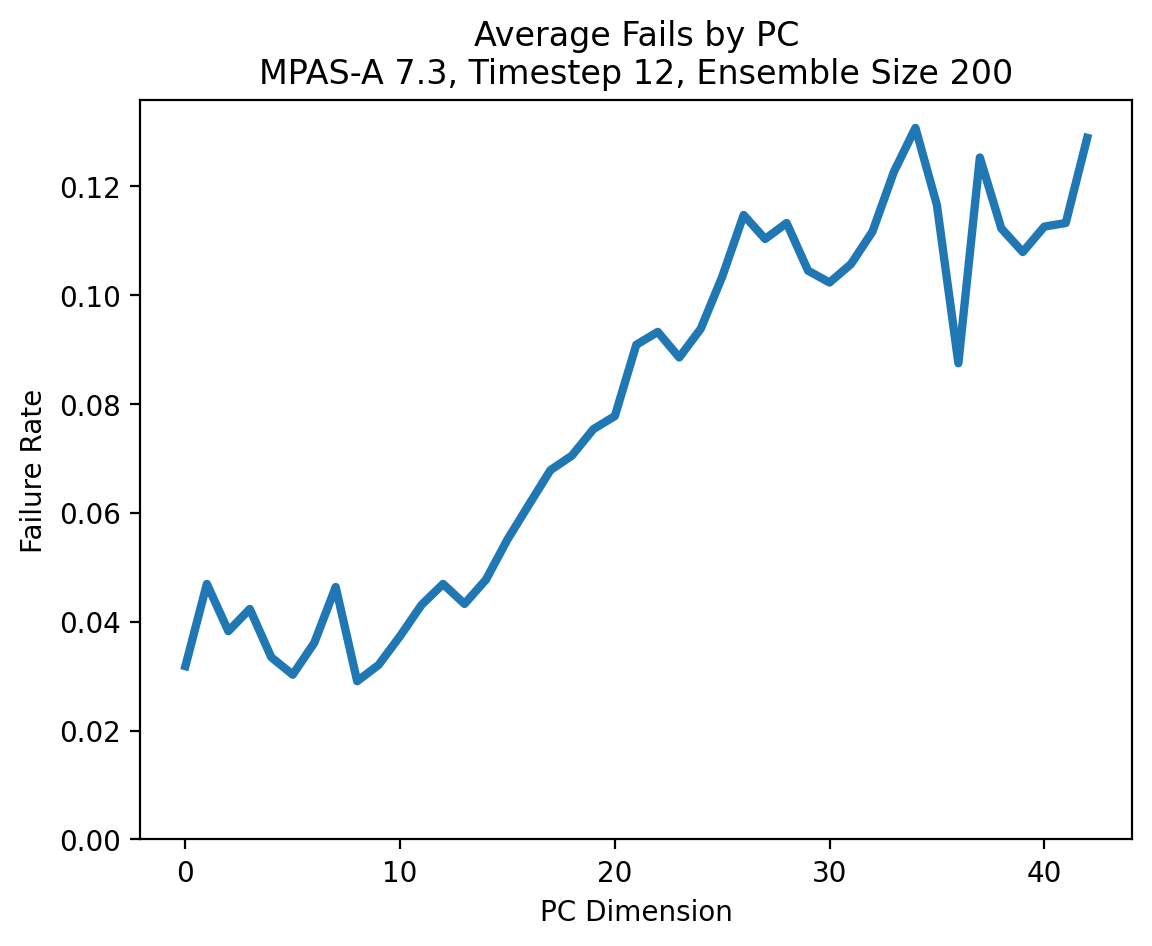

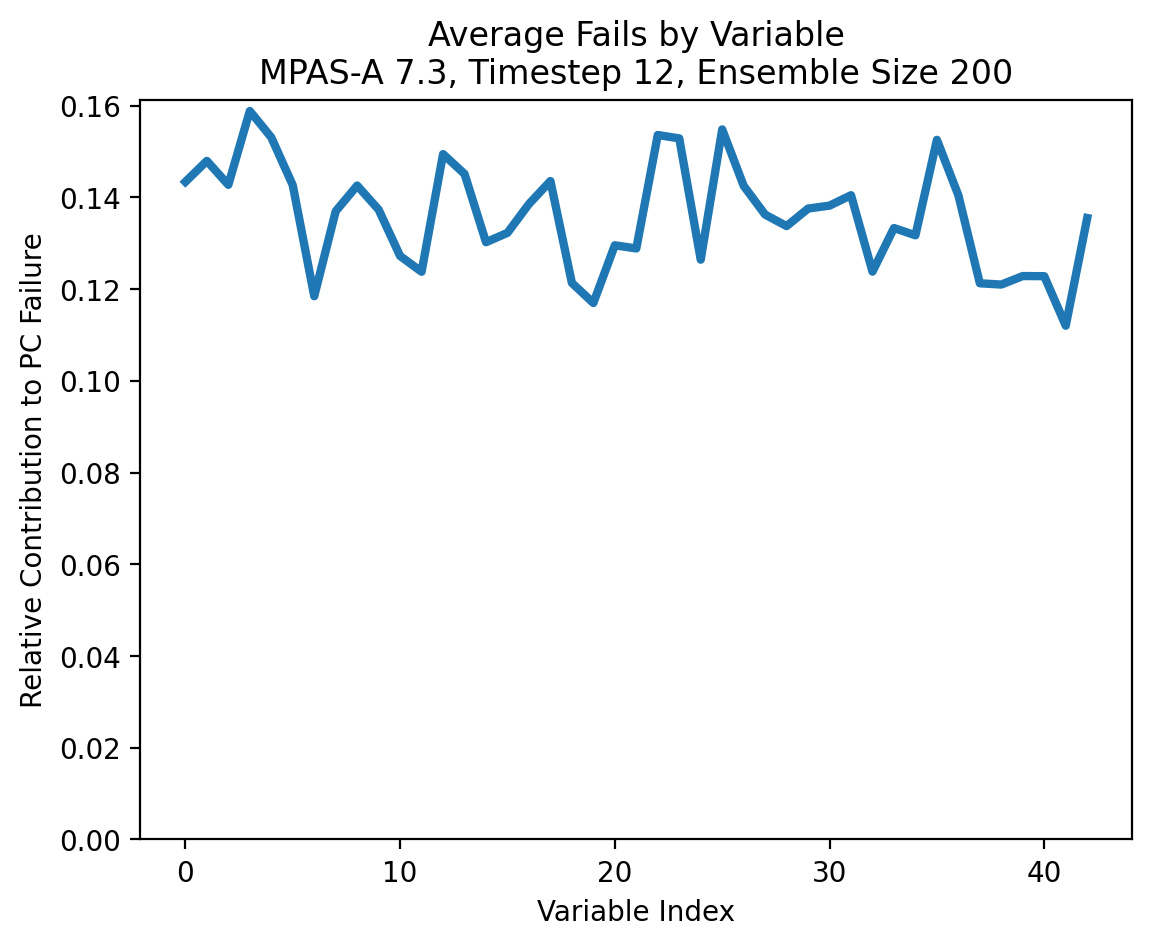

In [40]:
fpr_by_pc_and_var(all_standard_means, 100, 100, 200, timesteps, 12, 2)

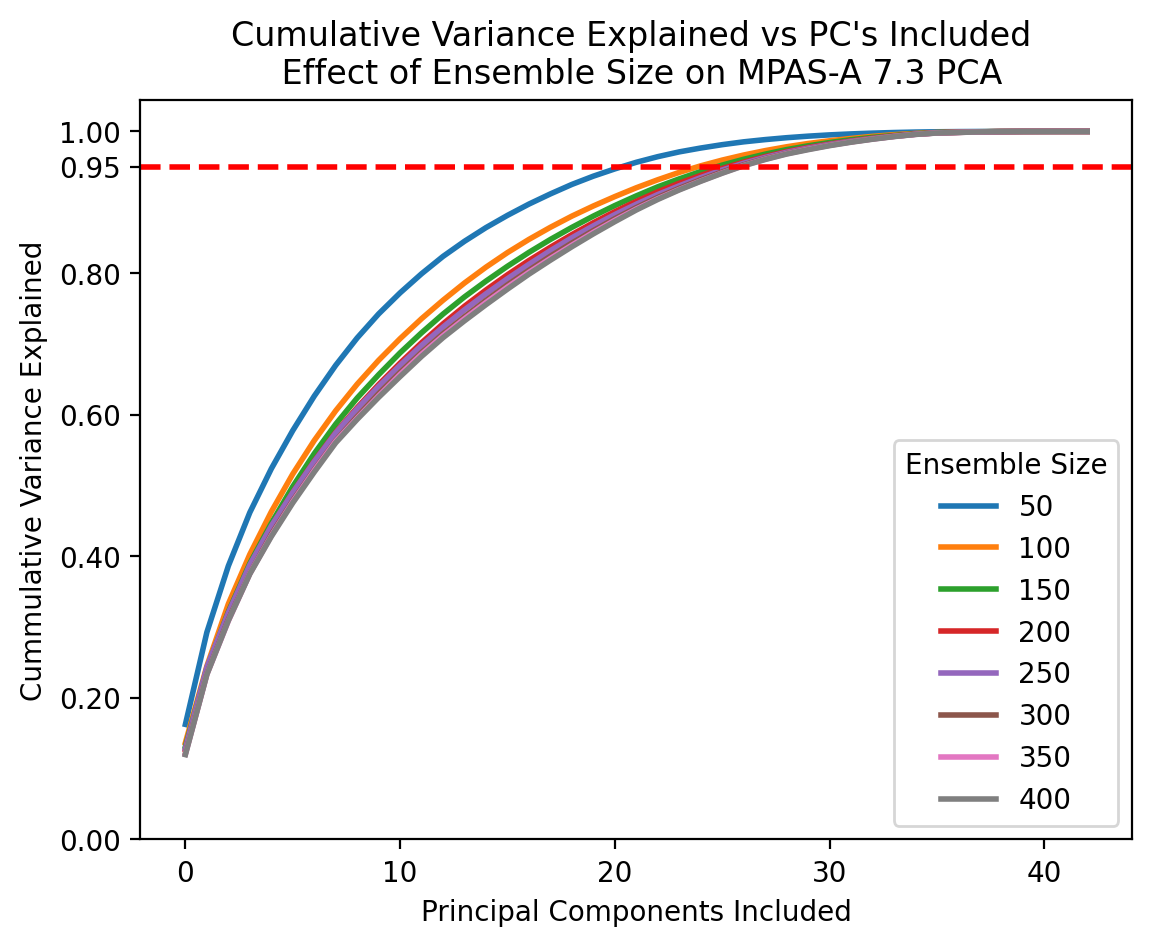

In [32]:
ensemble_sizes = list(range(50, 450, 50))
title = (
    "Cumulative Variance Explained vs PC's Included \n Effect of Ensemble Size on MPAS-A 7.3 PCA"
)
variance_explained_vs_ensemble_size_plot(
    all_standard_means, 10, ensemble_sizes, timesteps, 12, title
)

# Additional Plots For Paper

In [33]:
# effect of latent dimension on PCA bias
n_vars = 50
n_samples = 1000
PCs = np.array(list(range(n_vars, 0, -1)))
bias = np.zeros(n_vars)
rel_bias = np.zeros(n_vars)
for i in range(n_vars):
    temp = 0
    for j in range(n_vars):
        if i != j:
            temp += PCs[j] / (PCs[i] - PCs[j])
    bias[i] = ((temp / n_samples) + 1) * PCs[i] - PCs[i]
    rel_bias[i] = temp / n_samples

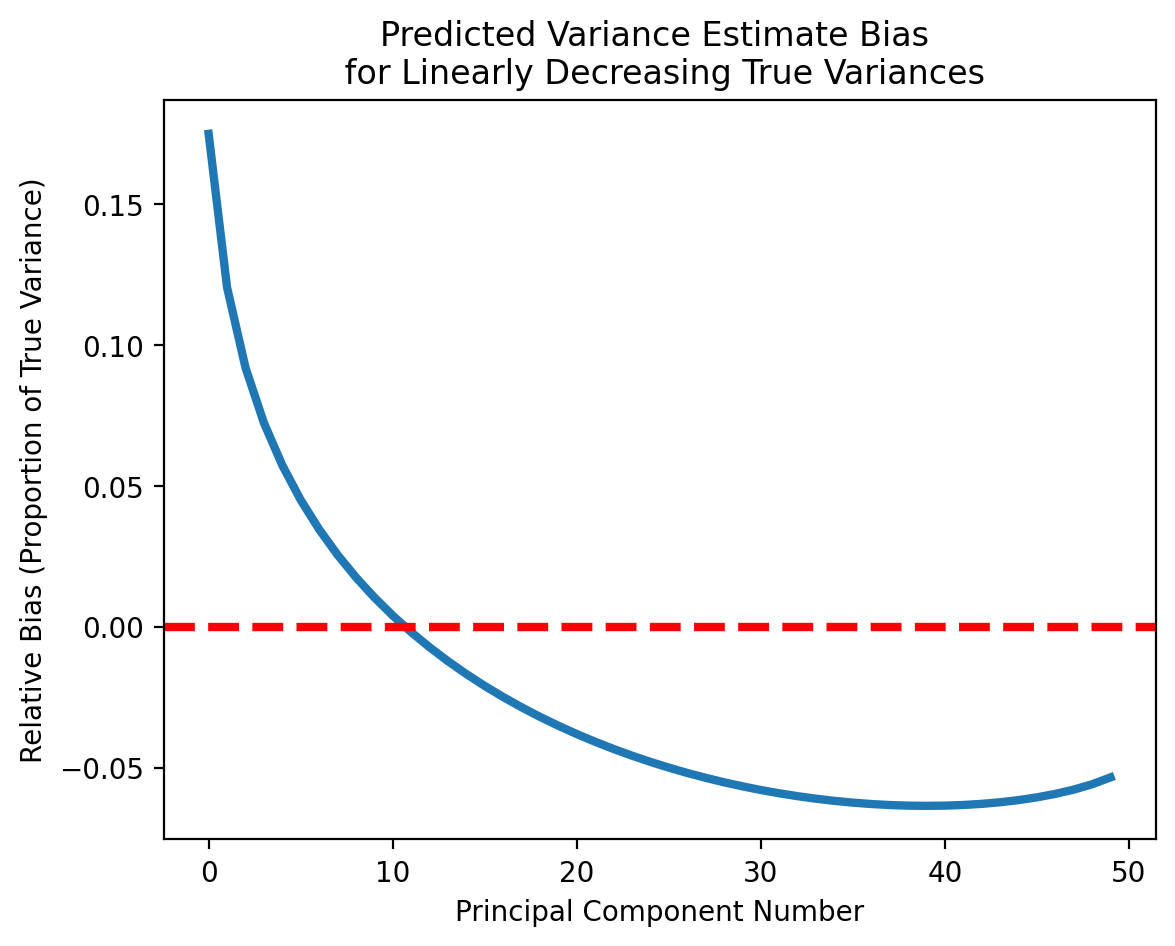

In [34]:
plt.plot(rel_bias)
plt.title("Predicted Variance Estimate Bias \n for Linearly Decreasing True Variances")
plt.xlabel("Principal Component Number")
plt.ylabel("Relative Bias (Proportion of True Variance)")
plt.axhline(y=0, color='red', linestyle='dashed')
plt.show()

In [22]:
# Experimental PCA Bias
folder_name = "../data"
gathered_mpas_means = np.load(f"{folder_name}/MPASA_sample_means.npy")
extracted_vars = np.load(f"{folder_name}/MPASA_sample_variances.npy")
ground_truth_cov = np.cov(gathered_mpas_means[:, :, 5], rowvar=False)
scaled_mpas_means = sklearn.preprocessing.scale(gathered_mpas_means[:, :, 5])
scaled_ground_truth_cov = np.cov(scaled_mpas_means, rowvar=False)

/Users/teopb/miniconda3/envs/numerical/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:259: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


In [23]:
def predicted_pca_bias(true_vals, sample_size):
    bias = np.zeros(len(true_vals))
    for i in range(len(true_vals)):
        temp_bias = 0
        for j in range(len(true_vals)):
            if j != i:
                if (true_vals[i] - true_vals[j]) != 0:
                    temp_bias += true_vals[j] / (true_vals[i] - true_vals[j])

        bias[i] = temp_bias * (true_vals[i] / sample_size)

    return bias


def synthetic_s_bias(test_repeats, sample_size, cov):
    var_len = cov.shape[0]
    bias_data = np.zeros((test_repeats, var_len))
    s_estimated_data = np.zeros((test_repeats, var_len))

    u, s, vh = np.linalg.svd(cov, full_matrices=True)

    for i in range(test_repeats):
        synthetic_samples = np.random.multivariate_normal(np.zeros(var_len), cov, size=sample_size)

        pca_sampled = PCA(svd_solver='full')

        pca_sampled.fit(synthetic_samples)

        s_estimated_data[i, :] = pca_sampled.explained_variance_

        bias_data[i, :] = pca_sampled.explained_variance_ - s

    return s_estimated_data, bias_data


def rel_synthetic_s_bias(test_repeats, sample_size, cov):
    var_len = cov.shape[0]
    bias_data = np.zeros((test_repeats, var_len))
    s_estimated_data = np.zeros((test_repeats, var_len))

    u, s, vh = np.linalg.svd(cov, full_matrices=True)

    for i in range(test_repeats):
        synthetic_samples = np.random.multivariate_normal(np.zeros(var_len), cov, size=sample_size)

        pca_sampled = PCA(svd_solver='full')

        pca_sampled.fit(synthetic_samples)

        s_estimated_data[i, :] = pca_sampled.explained_variance_

        bias_data[i, :] = (pca_sampled.explained_variance_ - s) / np.abs(s)

    return s_estimated_data, bias_data


def anderson_adjustment(estimated_scores, n):
    var_count = len(estimated_scores)
    adjusted_scores = np.zeros(var_count)

    for i in range(var_count):
        dif_term = 0
        for j in range(var_count):
            if j != i:
                dif_term += estimated_scores[j] / (estimated_scores[i] - estimated_scores[j])

        adjusted_scores[i] = estimated_scores[i] * (1 - (1 / n) * dif_term)

    return adjusted_scores


def rel_synthetic_s_anderson_bias(test_repeats, sample_size, cov):
    var_len = cov.shape[0]
    bias_data = np.zeros((test_repeats, var_len))
    s_estimated_data = np.zeros((test_repeats, var_len))

    u, s, vh = np.linalg.svd(cov, full_matrices=True)

    for i in range(test_repeats):
        synthetic_samples = np.random.multivariate_normal(np.zeros(var_len), cov, size=sample_size)

        pca_sampled = PCA(svd_solver='full')

        pca_sampled.fit(synthetic_samples)

        s_estimated_data[i, :] = anderson_adjustment(pca_sampled.explained_variance_, sample_size)

        bias_data[i, :] = (s_estimated_data[i, :] - s) / np.abs(s)

    return s_estimated_data, bias_data

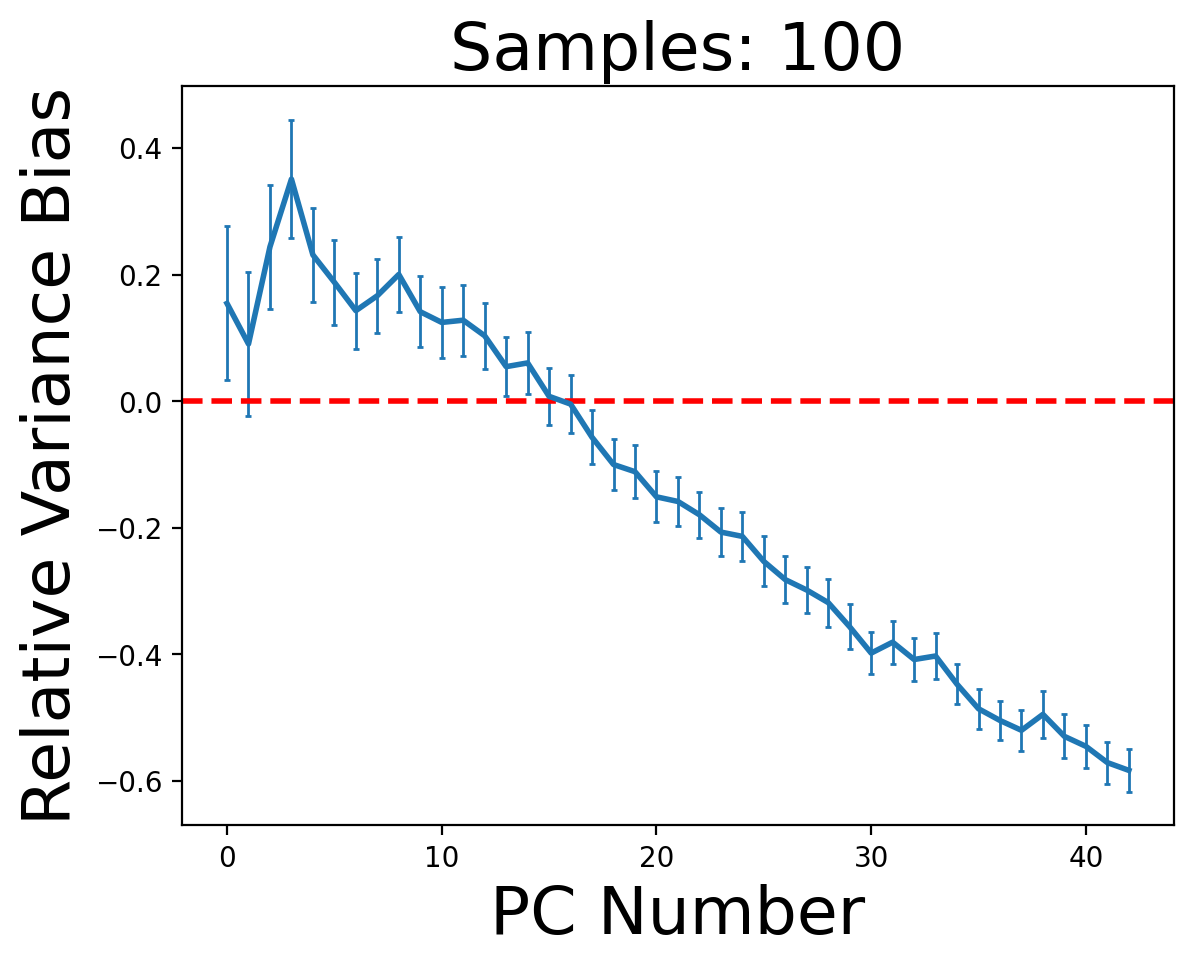

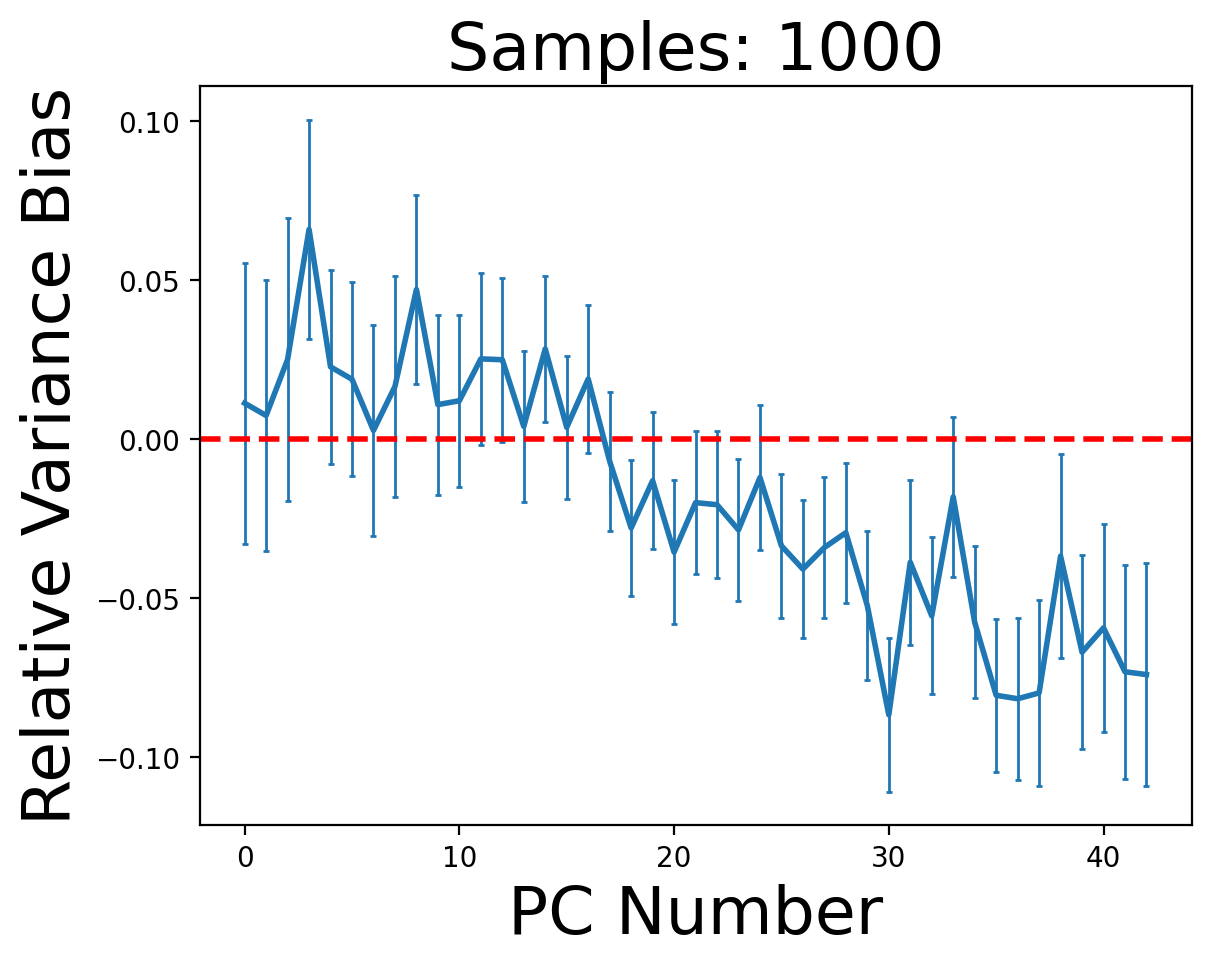

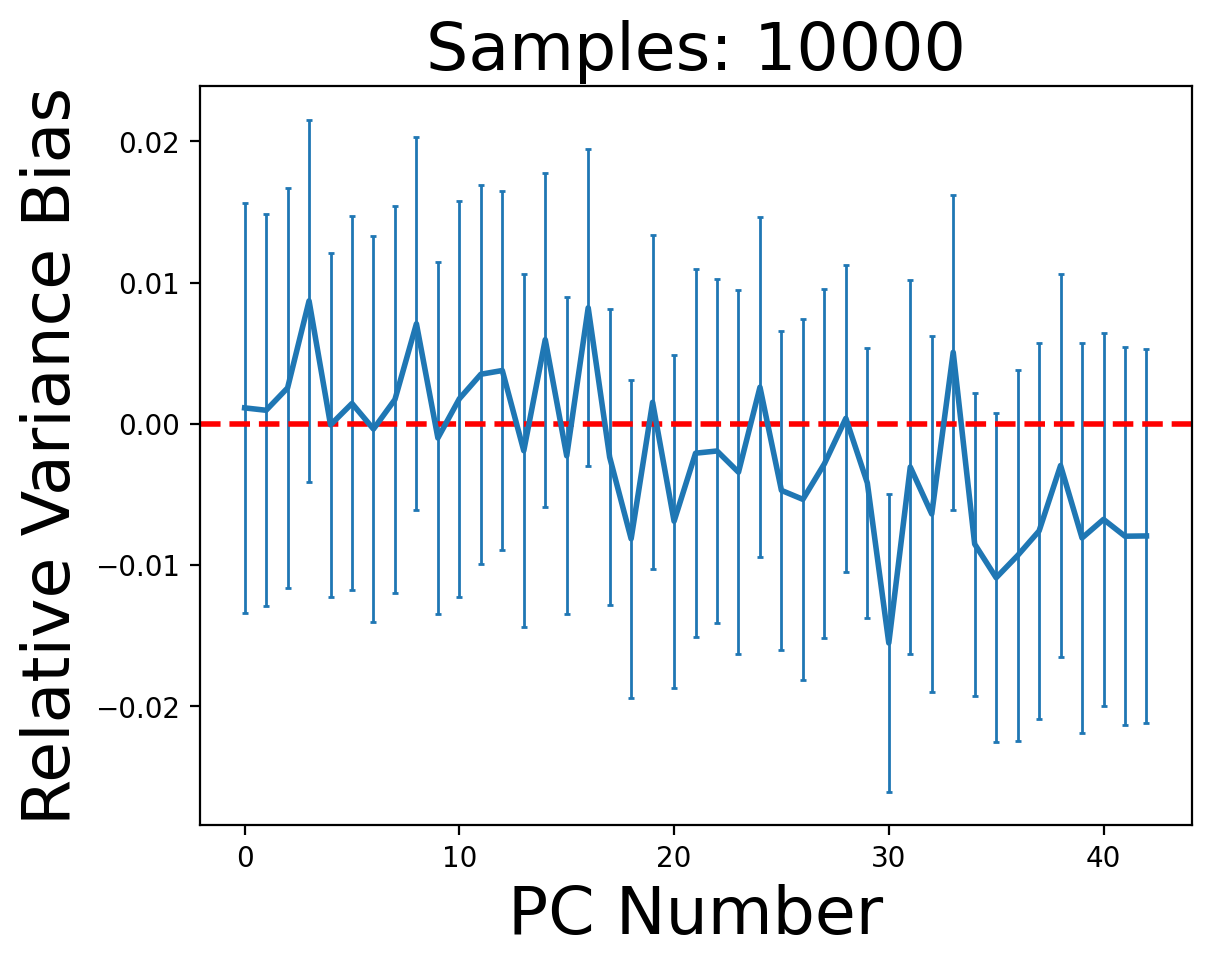

In [26]:
plt.rcParams['lines.linewidth'] = 2
for sample_size in [100, 1000, 10000]:
    test_repeats = 500

    #     Only plot up to the 43 variable dimensions that exclude constant variables etc due to numerical issues with final PCA values
    up_to = 43

    s_syn_anderson, bias_syn_anderson = rel_synthetic_s_anderson_bias(
        test_repeats, sample_size, scaled_ground_truth_cov
    )
    s_syn, bias_syn = rel_synthetic_s_bias(test_repeats, sample_size, scaled_ground_truth_cov)
    plt.errorbar(
        x=list(range(scaled_ground_truth_cov.shape[0])[:up_to]),
        y=np.mean(bias_syn, axis=0)[:up_to],
        yerr=np.std(bias_syn, axis=0)[:up_to],
        label="Standard",
        elinewidth=1,
        capsize=1,
    )

    u, s, vh = np.linalg.svd(scaled_ground_truth_cov, full_matrices=True)
    bias = predicted_pca_bias(s, sample_size)

    plt.title(f"Samples: {str(sample_size)}", fontsize=24)
    plt.xlabel("PC Number", fontsize=24)
    plt.ylabel("Relative Variance Bias", fontsize=24)
    plt.axhline(y=0.0, color="red", linestyle="dashed")
    plt.show()

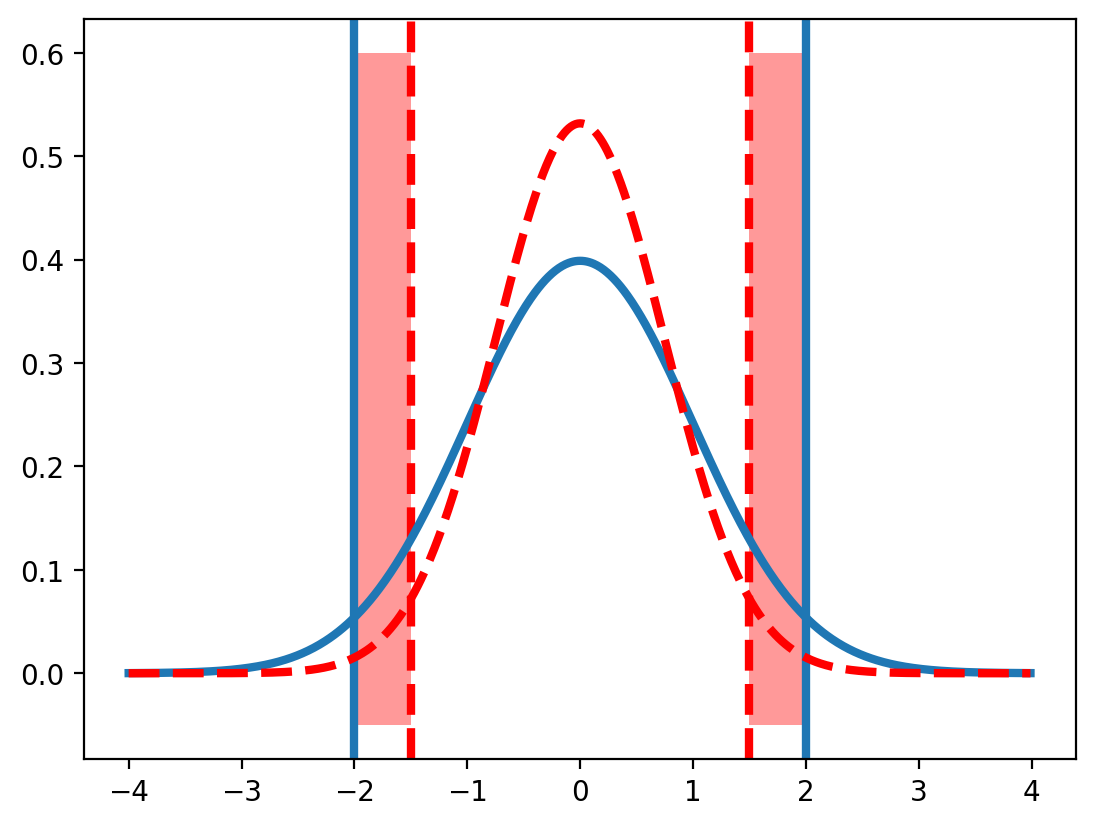

In [23]:
# Theoretical additional failure regions
from scipy.stats import norm

x_axis = np.arange(-4, 4, 0.01)
biased_scale = 0.75
standard_scale = 1

plt.fill_betweenx(
    [-0.05, 0.6],
    x1=-2 * standard_scale,
    x2=-2 * biased_scale,
    facecolor='red',
    alpha=0.4,
    edgecolor='none',
)
plt.fill_betweenx(
    [-0.05, 0.6],
    x1=2 * standard_scale,
    x2=2 * biased_scale,
    facecolor='red',
    alpha=0.4,
    edgecolor='none',
)


plt.axvline(x=2 * standard_scale, color='C0')
plt.axvline(x=2 * biased_scale, color='red', linestyle="dashed")

plt.axvline(x=-2 * standard_scale, color='C0')
plt.axvline(x=-2 * biased_scale, color='red', linestyle="dashed")

plt.plot(x_axis, norm.pdf(x_axis))
plt.plot(x_axis, norm.pdf(x_axis, scale=biased_scale), color='red', linestyle="dashed")

# plt.fill_betweenx([-.05, .6], x1=-2 * standard_scale, x2=-2 * biased_scale, color='red', alpha=.4)

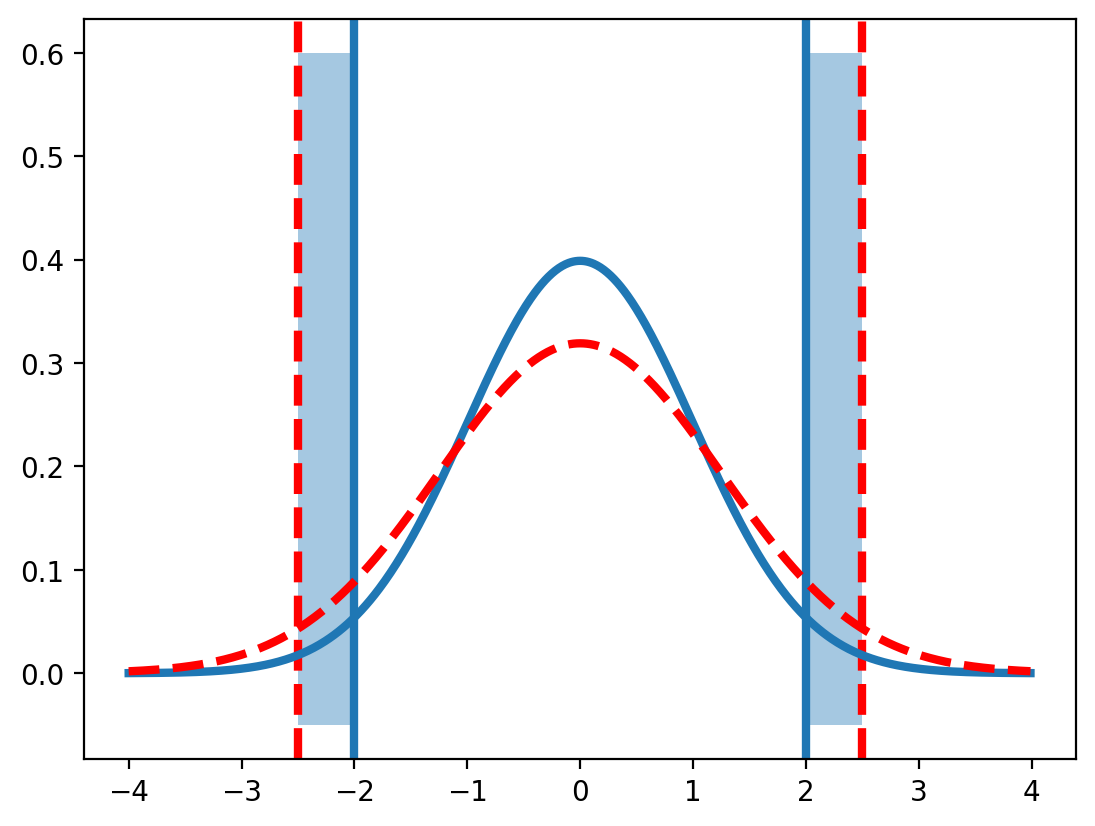

In [26]:
# Theoretical additional failure regions
from scipy.stats import norm

x_axis = np.arange(-4, 4, 0.01)
biased_scale = 1.25
standard_scale = 1

plt.fill_betweenx(
    [-0.05, 0.6],
    x1=-2 * standard_scale,
    x2=-2 * biased_scale,
    facecolor='C0',
    alpha=0.4,
    edgecolor='none',
)
plt.fill_betweenx(
    [-0.05, 0.6],
    x1=2 * standard_scale,
    x2=2 * biased_scale,
    facecolor='C0',
    alpha=0.4,
    edgecolor='none',
)


plt.axvline(x=2 * standard_scale, color='C0')
plt.axvline(x=2 * biased_scale, color='red', linestyle="dashed")

plt.axvline(x=-2 * standard_scale, color='C0')
plt.axvline(x=-2 * biased_scale, color='red', linestyle="dashed")

plt.plot(x_axis, norm.pdf(x_axis))
plt.plot(x_axis, norm.pdf(x_axis, scale=biased_scale), color='red', linestyle="dashed")